# Introduction to NumPy

Handy cheatsheet: https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python

### Preamble

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

In [38]:
%matplotlib widget

## Function to visualize arrays

In [39]:
def voxelize_array(data,alpha=1.0,text=True):

    if len(data.shape) > 4:
        print("Sorry, can't process >4-dimensional input array")
        return None
    while len(data.shape) < 4:
        data = np.expand_dims(data,0)

    i_arr, j_arr, k_arr = np.indices(data.shape[:-1])

    shape = list(data.shape[:-1]) #can only visualize up to 3 dimensions
    if data.shape[-1] == 4:
        colors = data
    elif data.shape[-1] == 3:
        colors = np.concatenate((data,np.full(shape + [1],alpha)),axis=-1)
    else:
        if np.max(data) <= 1 and np.min(data) >=0:
            opacity = data
        elif np.ptp(data) > 0:
            opacity = (data - min(data))/np.ptp(data)
        elif np.max(data) != 0:
            opacity = 0.9*data/max(data)

        #opacity = np.clip(opacity,0,1.0)

        colors = (np.ones(shape + [3]))
        colors = np.concatenate((colors,opacity),-1)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'{shape[0]} x {shape[1]} x {shape[2]} array')
    ax.set_proj_type('ortho')
    ax.set_box_aspect((max(np.ptp(i_arr),1), max(np.ptp(j_arr),1), max(np.ptp(k_arr),1)))
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.voxels(np.ones(shape), edgecolors = 'black', facecolors = colors)

    if text:
        for i,j,k in zip(i_arr.flatten(), j_arr.flatten(), k_arr.flatten()):
            label = f'{i}{j}{k}'
            ax.text(i+0.3,j+0.3,k+0.3, label, None)

    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_zlabel('k')


## 1) Fun with arrays

### Creation

In [40]:
### From list:
my_list = [[1,23,2],
           [56,789,10]]
my_arr = np.array(my_list)

In [41]:
my_arr.shape

(2, 3)

In [42]:
### Constant:
full_arr = np.full((2,3,2),926.2)
full_arr

array([[[926.2, 926.2],
        [926.2, 926.2],
        [926.2, 926.2]],

       [[926.2, 926.2],
        [926.2, 926.2],
        [926.2, 926.2]]])

In [43]:
### Random:
rand_arr = np.random.random((3,3,3,4))

In [44]:
### Zeros / ones:
zeros_arr = np.zeros((3,2,4))
ones_arr = np.ones((5,3,3,1))

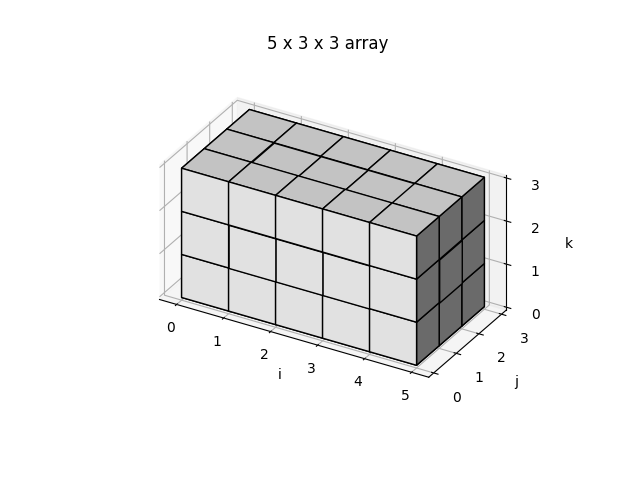

In [45]:
voxelize_array(ones_arr)

### Properties

In [46]:
ones_arr.shape

(5, 3, 3, 1)

In [47]:
ones_arr.size

45

In [48]:
ones_arr.dtype

dtype('float64')

### Math

In [49]:
apples = ones_arr.copy()
apples = 0.9*apples

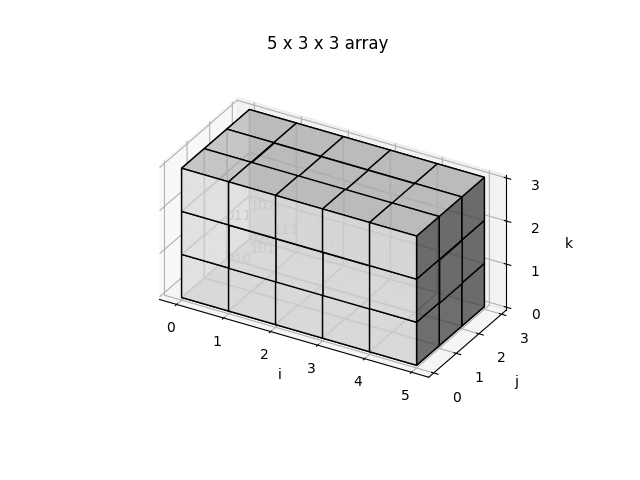

In [50]:
voxelize_array(apples)

### Assignment
Let's try to "hide" one of the boxes

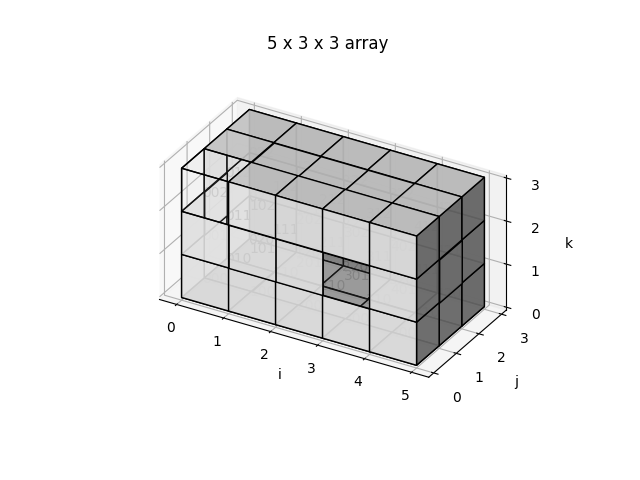

In [51]:
apples[3,0,1] = 0.1
apples[0,0,2] = 0.1
voxelize_array(apples)

### Logic

In [52]:
greater_than_half = apples > 0.5
apples = np.where(greater_than_half,
                  0.1,
                  1.0)

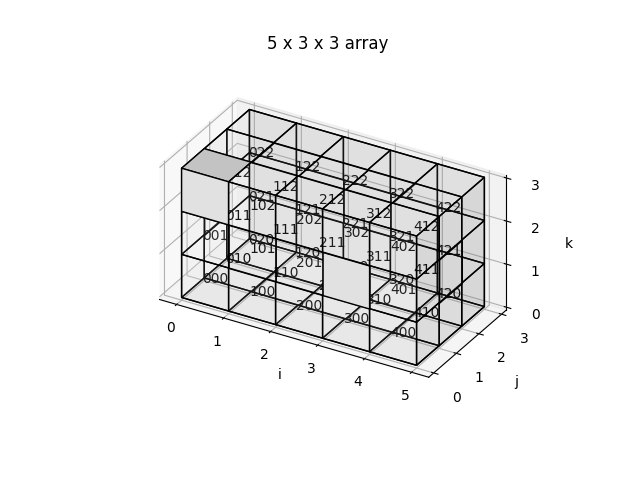

In [53]:
voxelize_array(apples)

### Slicing (selecting)

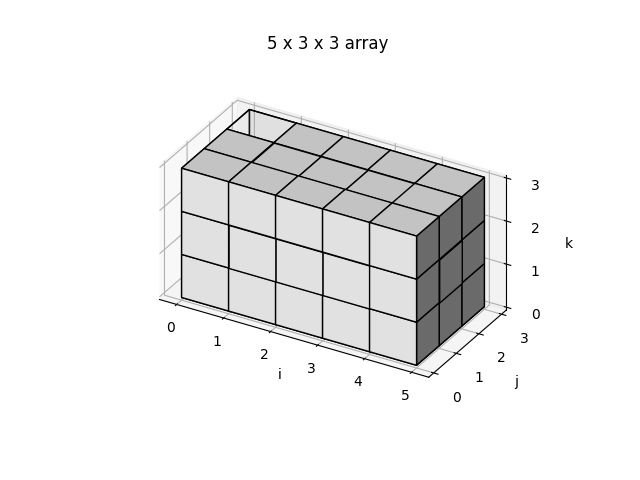

In [54]:
apples = ones_arr.copy()
apples[0,-1,:] = 0.1
voxelize_array(apples)

### Reshaping

In [55]:
apples = ones_arr.copy()
print(apples.shape)

(5, 3, 3, 1)


In [56]:
apples = apples.reshape(1,15,3,1)

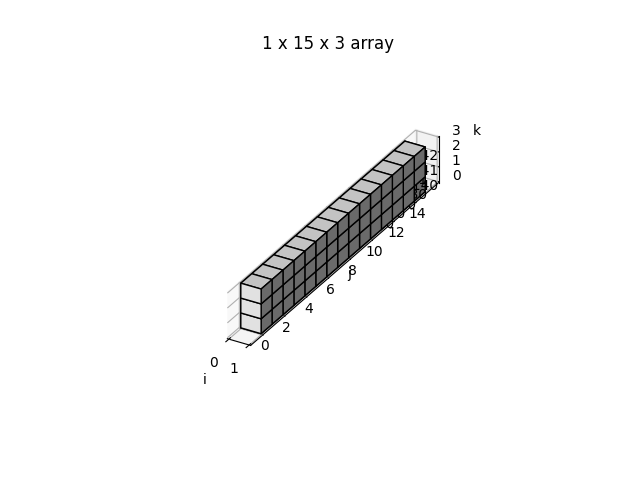

In [57]:
voxelize_array(apples)

## 2) Making apples

In [58]:
red = [1,0,0,0.8] # = [R, G, B, alpha]
apples = np.tile(red,(15,15,15,1))

In [60]:
apples.shape

(15, 15, 15, 4)

/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_95082/2875617725.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


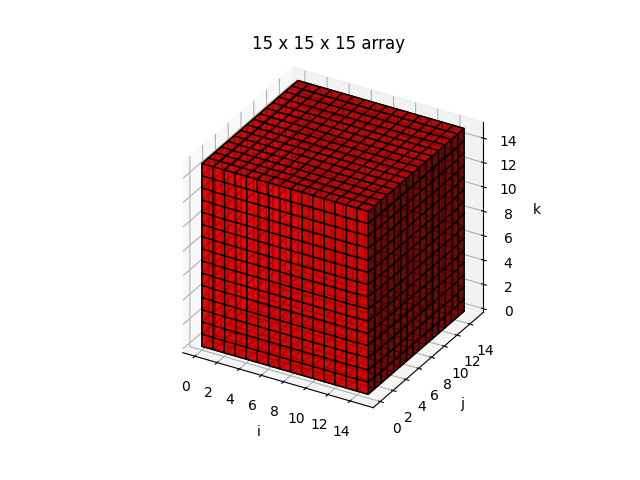

In [61]:
voxelize_array(apples,text=False)

In [62]:
i, j, k, c = np.indices(apples.shape)

In [63]:
diameter = np.mean(apples.shape[:-1])
distance = (i - np.mean(i))**2 + (j - np.mean(j))**2 + (k - np.mean(k))**2
corners = distance > 1.1*(diameter/2)**2

In [64]:
apples = np.where(corners,[0,0,1,1],[1,0,0,1])

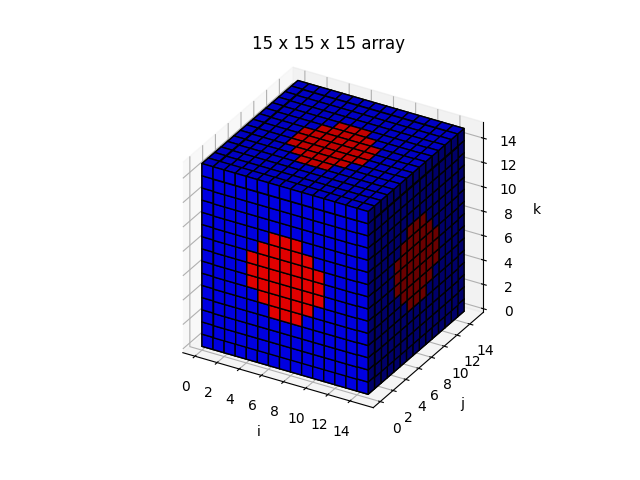

In [65]:
voxelize_array(apples,text=False)

## 3) Combining apples and oranges

In [66]:
oranges = np.tile([247/256, 162/256, 17/256, 0.8],(15,15,15,1))

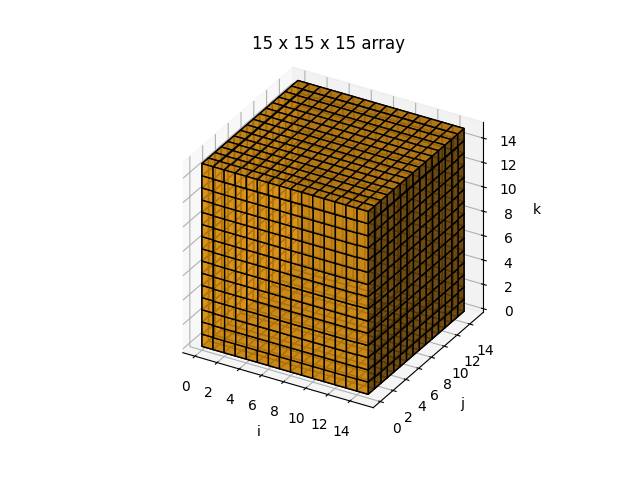

In [67]:
voxelize_array(oranges,text=False)

### Concatenate

In [72]:
fruits = np.concatenate((apples,oranges),axis=1)

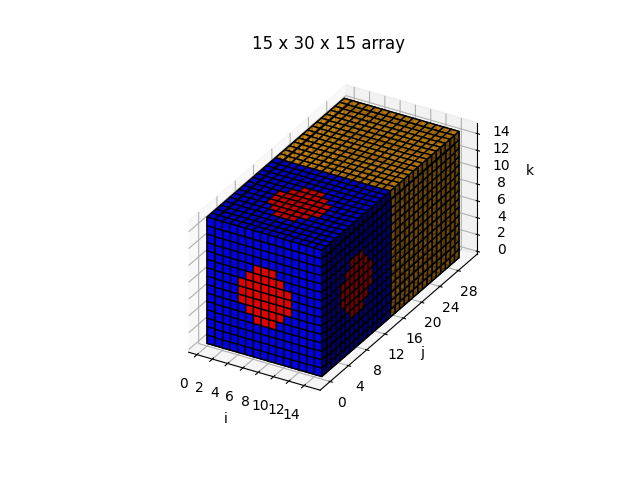

In [73]:
voxelize_array(fruits,text=False)

### Interleave

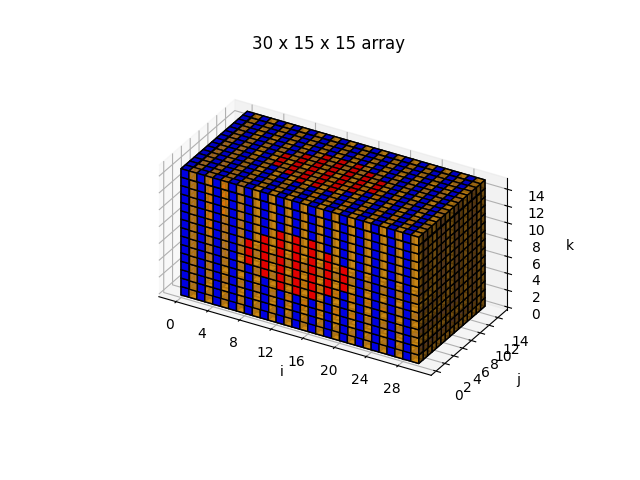

In [74]:
fruit_salad = fruits.reshape(30,15,15,4)
voxelize_array(fruit_salad,text=False)

### Split

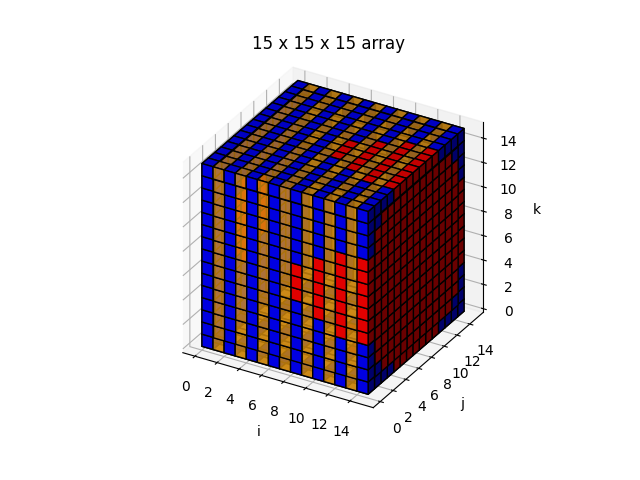

In [75]:
fruit_serving_1, fruit_serving_2 = np.split(fruit_salad,2,axis=0)
voxelize_array(fruit_serving_1,text=False)

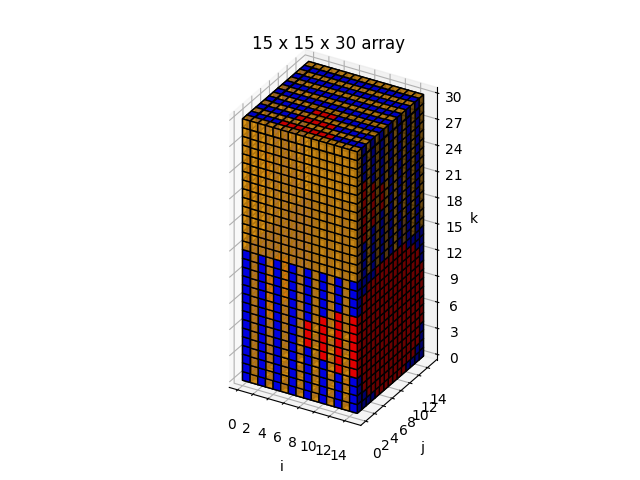

In [76]:
fruit_serving_2 = np.swapaxes(fruit_serving_2,0,1)
fruit_salad = np.concatenate((fruit_serving_1,fruit_serving_2),axis=2)
voxelize_array(fruit_salad,text=False)

### Matrix-multiply

In [77]:
def z_rotation(theta):
    mat = [
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta),  np.cos(theta), 0],
            [0,          0,                 1],
        ]
    return mat

In [78]:
colors_only = np.matmul(fruit_salad[...,:-1],z_rotation(np.pi/3))
techno_salad  = np.concatenate((colors_only, fruit_salad[...,np.newaxis,-1]),-1)
techno_salad = np.abs(techno_salad).clip(0,1)

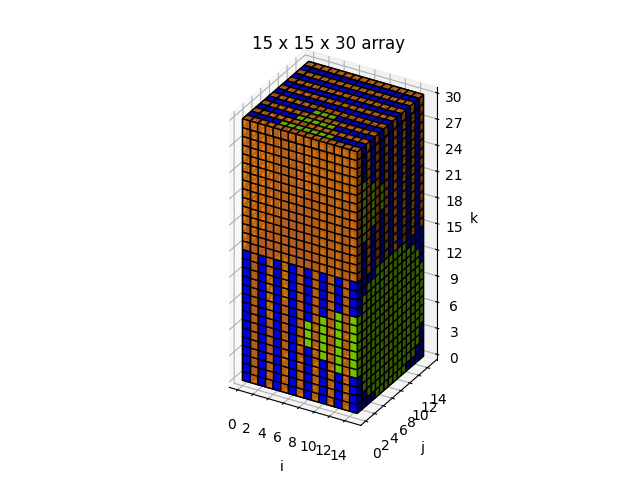

In [79]:
voxelize_array(techno_salad,text=False)